#  Úvod do strojového učení  
##  Základní pojmy


+  **Strojové učení** (*Machine Learning*)
   
   Pojem *strojové učení* označuje algoritmy a modely, které umožňují počítači se samostatně učit. To typicky znamená,   
   odvodit si nějaké závislosti z předložených dat nebo zdokonalovat své chování na základě interakce s okolím.
   V oblasti datové analýzy chápeme strojové učení zejména jako nástroj na vytváření modelů (z) dat.

   Pozn.: Český překlad *strojové učení* není přesný, jedná o učení strojů, nikoli o strojové (automatizované) učení.
   
   
+ **Základní typy algoritmů strojového učení** 

  + **Učení s učitelem** (*Supervised learning*)
  + **Učení bez učitele** (*Unsupervised learning*)
  + **Zpětnovazebné učení** (*Reinforcement learning*) [zpětnovazebné učení je nad rámec tohoto kurzu]
   
  
+  **Učení s učitelem** 

  Učení se jmenuje s učitelem proto, že učící algoritmus dostane vždy k dispozici data **včetně požadovaných (správných)
  výstupů**. Cílem je modelovat vztah mezi vstupy (vektorem příznaků, features) a výstupy (nějaký label **FIXME**). Naučený model pak umožňuje pro nový vektor příznaků predikovat hodnotu výstupu.  
  Datům, která se používají pro učení, se říká **tréninková množina**. 
  
  Základní dvě úlohy, které spadají pod učení se učitelem, jsou **klasifikace** a **regrese**. 
  
  + **Klasifikace** 
   
    V klasifikačních úlohách představuje výstup modelu (label) indikátor třídy.
  
  + **Regrese**
  
    V regresních úlohách je na výstupu modelu spojitá hodnota. 
    

## Příklad klasifikace


Ukažme si klasifikaci na známé a jednoduché datové množině Iris. Jedná se o klasifikaci květů kostatců, 
datová množina obsahuje tři třídy Setosa, Versicolor a Virginica. 

![kosatce ukazka](./static/kosatce.jpeg)

Data obsahují 150 vzorků, každý vzorek se sestává ze 4 příznaků a labelu (jedné ze tří tříd).
![kosatce data](./static/iris_data.png)

**Cílem** klasifikační úlohy je modelovat vztah mezi příznaky 
(délky a šířky kališního lístku a délky a šířky okvětního lístku) a třídou (versicolor, setosa, virginica). Jinými slovy, vytvořit model -- klasifikátor, který nám pro dané hodnoty kalištních a okvětních lístků vrátí správné zařazení daného vzorku do třídy.

(Pozn. následující ukázka předpokládá nainstalované scikit-learn.)

In [7]:
from  sklearn import  datasets

iris = datasets.load_iris()   # načteme si data, Iris data jsou "vestavěná"
x = iris.data                 # příznaky 
y = iris.target               # třídy (labely)     

print("Příznaky: ", x.shape)
print("Třídy: ", y.shape)

print("První vzor: ", x[0], y[0])

Příznaky:  (150, 4)
Třídy:  (150,)
První vzor:  [5.1 3.5 1.4 0.2] 0


In [14]:
# Rozdělme si data na trénovací a testovací 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

print("Příznaky trénovací: ", x_train.shape)
print("Třídy trénovací: ", y_train.shape)
print("Příznaky testovací: ", x_test.shape)
print("Třídy testovací: ", y_test.shape)

Příznaky trénovací:  (120, 4)
Třídy trénovací:  (120,)
Příznaky testovací:  (30, 4)
Třídy testovací:  (30,)


In [35]:
# Teď vezmeme nějaký klasifikátor a naučíme ho 
from sklearn import tree

classifier=tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)

In [1]:
print("Příznaky:            Predikovaná třída:  Skutečná třída:")
print("--------------------------------------------------------")
for features, predicted_label, true_label in zip(x_test, predictions, y_test):
    print(features, "   ", predicted_label, "                 ", true_label, 
          "                ", "OK" if predicted_label == true_label else ":(") 

Příznaky:            Predikovaná třída:  Skutečná třída:
--------------------------------------------------------


NameError: name 'x_test' is not defined

## Příklad regrese

In [57]:
# načtení dat 
from sklearn import datasets 

diabetes = datasets.load_diabetes()
x = diabetes.data[:, 2].reshape(-1, 1) # změníme shape (442, ) na (442, 1)
y = diabetes.target

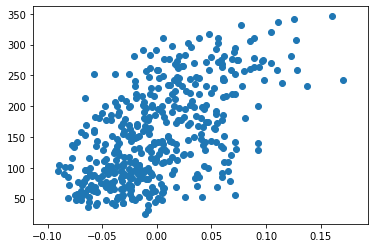

In [58]:
import matplotlib.pyplot as plt 

plt.scatter(x, y)

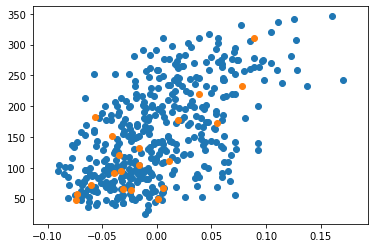

In [63]:
# rozdělme data na trénovací a testovací
x_train, x_test = x[:-20], x[-20:]
y_train, y_test = y[:-20], y[-20:]

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)

In [66]:
# volba modelu a natrénování 
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

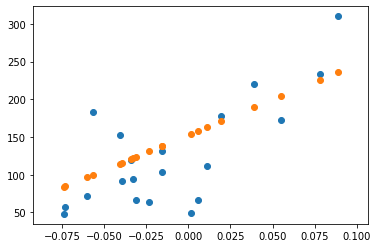

In [68]:
predictions = model.predict(x_test)

plt.scatter(x_test, y_test)
plt.scatter(x_test, predictions)

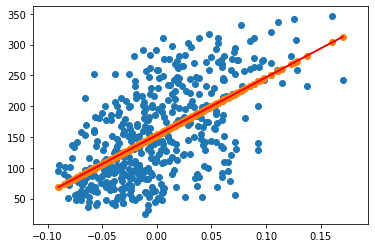

In [74]:
predictions = model.predict(x)
plt.scatter(x, y)
plt.scatter(x, predictions)
plt.plot(x, predictions, color="red")

<hr>


Obrázky Iris převzaté z https://medium.com/@jebaseelanravi96/machine-learning-iris-classification-33aa18a4a983 .